# OFAT SA

In [1]:
%matplotlib inline
from model import *
from agents import *
from globals import *
from server import *
from schedule import *
from utility import *
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

fixed_params = {
    "network_type": 1,
    "N": 100,
    "no_of_neighbors": 2,
    #"beta_component": 0.15,
    "similarity_treshold": 0.0,
    "social_influence": 0.0,
    "swingers": 0
}

variable_params = {
    #"N": range(100, 20, 50),
    #"no_of_neighbors": range(1, 3),
    "beta_component": np.arange(0.0, 1.0, 0.2),
    #"similarity_treshold": np.arange(0.0, 1.0, 0.5),
    #"social_influence": np.arange(0.0, 1.0, 0.5),
    #"swingers": range(0, 3)
}


# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 5
max_steps = 20

# Set the outputs
model_reporters = {
                "preferences": compute_preferences,
                "opinions": compute_opinions,
                "preference_A": compute_preference_A,
                "preference_B": compute_preference_B,
                "radical_opinions": compute_radical_opinions,
                "community_no": community_no,
}

data = {}

  
batch = BatchRunner(Network, 
                    max_steps=max_steps,
                    iterations=replicates,
                    fixed_parameters=fixed_params,
                    variable_parameters=variable_params,
                    model_reporters=model_reporters,
                    display_progress=True)
    
batch.run_all()
data = batch.get_model_vars_dataframe()

#print data
print(data)

1000 3 1 0.3 0.025 0.01 4



0it [00:00, ?it/s]

100 2 1 0.0 0.0 0.0 0



1it [00:00,  1.08it/s]

100 2 1 0.0 0.0 0.0 0



2it [00:01,  1.07it/s]

100 2 1 0.0 0.0 0.0 0



3it [00:02,  1.08it/s]

100 2 1 0.0 0.0 0.0 0



4it [00:03,  1.10it/s]

100 2 1 0.0 0.0 0.0 0



5it [00:04,  1.09it/s]

100 2 1 0.2 0.0 0.0 0



6it [00:05,  1.12it/s]

100 2 1 0.2 0.0 0.0 0



7it [00:06,  1.10it/s]

100 2 1 0.2 0.0 0.0 0



8it [00:07,  1.08it/s]

100 2 1 0.2 0.0 0.0 0



9it [00:08,  1.08it/s]

100 2 1 0.2 0.0 0.0 0



10it [00:09,  1.08it/s]

100 2 1 0.4 0.0 0.0 0



11it [00:10,  1.08it/s]

100 2 1 0.4 0.0 0.0 0



12it [00:11,  1.08it/s]

100 2 1 0.4 0.0 0.0 0



13it [00:11,  1.10it/s]

100 2 1 0.4 0.0 0.0 0



14it [00:12,  1.10it/s]

100 2 1 0.4 0.0 0.0 0



15it [00:13,  1.10it/s]

100 2 1 0.6000000000000001 0.0 0.0 0



16it [00:14,  1.08it/s]

100 2 1 0.6000000000000001 0.0 0.0 0



17it [00:15,  1.09it/s]

100 2 1 0.6000000000000001 0.0 0.0 0



18it [00:16,  1.11it/s]

100 2 1 0.6000000000000001 0.0 0.0 0



19it [00:17,  1.11it/s]

100 2 1 0.6000000000000001 0.0 0.0 0



20it [00:18,  1.13it/s]

100 2 1 0.8 0.0 0.0 0



21it [00:19,  1.13it/s]

100 2 1 0.8 0.0 0.0 0



22it [00:19,  1.15it/s]

100 2 1 0.8 0.0 0.0 0



23it [00:20,  1.13it/s]

100 2 1 0.8 0.0 0.0 0



24it [00:21,  1.09it/s]

100 2 1 0.8 0.0 0.0 0



25it [00:22,  1.08it/s]

    beta_component  Run  community_no  opinions  preference_A  preference_B  \
0              0.0    0            10      0.68      0.554258      0.616752   
1              0.0    1            11      0.64      0.474986      0.526495   
2              0.0    2            11      0.48      0.531836      0.617223   
3              0.0    3            12      0.60      0.587012      0.520869   
4              0.0    4            11      0.61      0.614264      0.543724   
5              0.2    5            13      0.67      0.561367      0.574537   
6              0.2    6            11      0.53      0.559544      0.563975   
7              0.2    7            10      0.60      0.612902      0.558603   
8              0.2    8            12      0.39      0.587655      0.626019   
9              0.2    9            13      0.63      0.549694      0.535834   
10             0.4   10            13      0.55      0.514931      0.525340   
11             0.4   11            13      0.40     

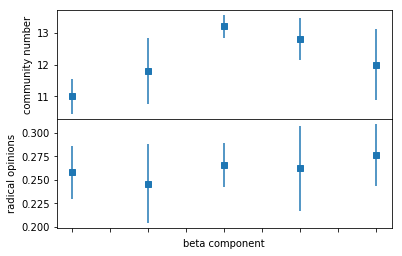

In [2]:
# Example plots for varying beta component

replicates = 5
distinct_samples = 5

beta_component = np.arange(0.0, 1.0, 0.2)

# community number
count=0
list_mean_community_no = []
list_err_community_no = []
for i in range(distinct_samples):
    community_no = []
    for j in range(replicates):
        community_no.append(data.community_no[count + j])
    count = count + j + 1
    mean = np.mean(community_no)
    std = np.std(community_no)
    err = 1.96 * std / np.sqrt(replicates)
    list_mean_community_no.append(mean)
    list_err_community_no.append(err)

# radical opinions
count=0
list_mean_radical_opinions = []
list_err_radical_opinions = []
for i in range(distinct_samples):
    radical_opinions = []
    for j in range(replicates):
        radical_opinions.append(data.radical_opinions[count + j])
    count = count + j + 1
    mean = np.mean(radical_opinions)
    std = np.std(radical_opinions)
    err = 1.96 * std / np.sqrt(replicates)
    list_mean_radical_opinions.append(mean)
    list_err_radical_opinions.append(err)


ax1 = plt.subplot(211, xticklabels=[])
plt.errorbar(beta_component, list_mean_community_no, yerr=list_err_community_no, marker='s', linestyle='None')
plt.ylabel('community number')

ax2 = plt.subplot(212, sharex = ax1)
plt.errorbar(beta_component, list_mean_radical_opinions, yerr=list_err_radical_opinions, marker='s', linestyle='None')
plt.xlabel('beta component')
plt.ylabel('radical opinions')

plt.subplots_adjust(hspace=.0)
plt.show()

# Sobol SA

I also tried sobol sensitivity analysis, but this doesn't work (yet)...

In [3]:
%matplotlib inline
from model import *
from agents import *
from globals import *
from server import *
from schedule import *
from utility import *
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# We define our variables and bounds

fixed_params = {
    "network_type": 1
}

problem = {
    'num_vars': 6,
    'names': ['N', 'no_of_neighbors', 'beta_component', 'similarity_treshold', 'social_influence', 'swingers'],
    'bounds': [[50, 250], [2, 5], [0.1, 1.0], [0.01, 1.0], [0.01, 1.0], [1, 5]]
}

# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 100
max_steps = 200
distinct_samples = 10

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples)
# print(param_values)

# Set the outputs
model_reporters = {
                "preferences": compute_preferences,
                "opinions": compute_opinions,
                "preference_A": compute_preference_A,
                "preference_B": compute_preference_B,
                "radical_opinions": compute_radical_opinions,
                "community_no": community_no,
}


# BatchRunner
batch = BatchRunner(Network, 
                    max_steps=max_steps,
                    fixed_parameters=fixed_params,
                    variable_parameters={name:[] for name in problem['names']},
                    model_reporters=model_reporters)

count = 0
for i in range(replicates):
    for vals in param_values: 
        # Change parameters that should be integers
        vals = list(vals)
#         vals[2] = int(vals[2])

        # Transform to dict with parameter names and their values
        variable_parameters = {}
        for name, val in zip(problem['names'], vals):
            variable_parameters[name] = val
        variable_parameters['network_type']=1
        variable_parameters['N']=int(variable_parameters['N'])
        variable_parameters['no_of_neighbors']=int(variable_parameters['no_of_neighbors'])
        variable_parameters['swingers']=int(variable_parameters['swingers'])
#         print(variable_parameters)
#         print(variable_parameters)
        batch.run_iteration(variable_parameters, tuple(vals), count)
        count += 1

        clear_output()
        print(f'{count / (len(param_values) * (replicates)) * 100:.2f}% done')
    
data = batch.get_model_vars_dataframe()
print(data)

TypeError: __init__() missing 1 required positional argument: 'malicious_N'

In [4]:
community_number = sobol.analyze(problem, data['community_no'].as_matrix(), print_to_console=True)
radical_opinions = sobol.analyze(problem, data['radical_opinions'].as_matrix(), print_to_console=True)

Parameter S1 S1_conf ST ST_conf
N 0.375747 0.481686 0.213859 0.145917
no_of_neighbors 0.696211 0.517229 0.264038 0.134406
beta_component 0.221522 0.285835 0.096774 0.062828
similarity_treshold 0.259054 0.284471 0.100358 0.056074
social_influence 0.050043 0.222675 0.050179 0.043867
swingers 0.163902 0.223514 0.048984 0.036222

Parameter_1 Parameter_2 S2 S2_conf
N no_of_neighbors -0.293258 0.800403
N beta_component -0.188121 0.778987
N similarity_treshold -0.221574 0.749371
N social_influence -0.195289 0.745905
N swingers -0.214405 0.737514
no_of_neighbors beta_component -0.648575 0.685285
no_of_neighbors similarity_treshold -0.701144 0.664327
no_of_neighbors social_influence -0.667691 0.633667
no_of_neighbors swingers -0.693975 0.653991
beta_component similarity_treshold -0.192712 0.367551
beta_component social_influence -0.171207 0.382701
beta_component swingers -0.171207 0.360134
similarity_treshold social_influence -0.227855 0.346331
similarity_treshold swingers -0.254139 0.316274
so

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

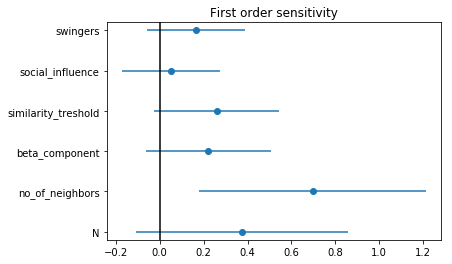

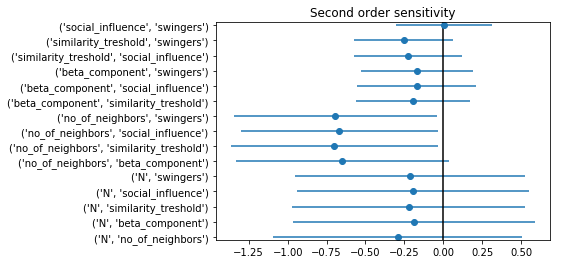

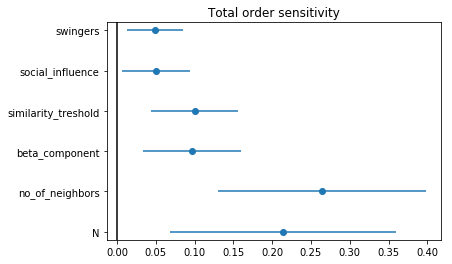

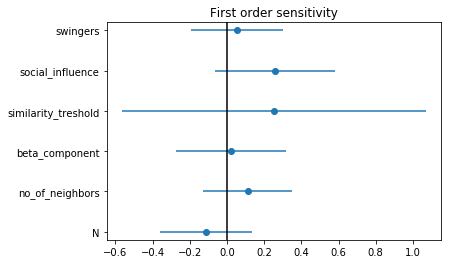

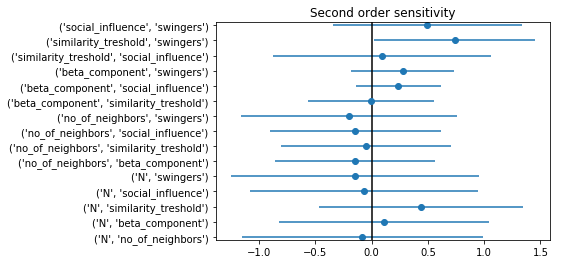

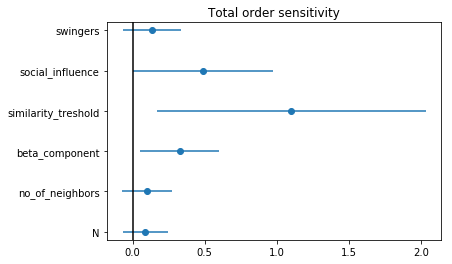

In [7]:
for Si in (community_number, radical_opinions):
    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.show()

    # Second order
    plot_index(Si, problem['names'], '2', 'Second order sensitivity')
    plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    plt.show()